# MadGraph5_aMC@NLO Local Installation & Analysis v3.6.3

## 1. Setup Working Directory

In [ ]:
%%bash
# Only create the directory if it doesn't already exist
if [ ! -d "madgraph_tutorial" ]; then
    mkdir madgraph_tutorial
fi
cd madgraph_tutorial

## 2. Conda Environment Setup

In [ ]:
%%bash
# Set up a dummy python/conda environment by hand, or by using vscode
# It's imperative that you have it, else things won't work.
# 1) Source the conda.sh hook so `conda activate` actually works in this cell
source "$(conda info --base)/etc/profile.d/conda.sh"

conda env list
# 2) Create the env if it doesn't already exist
if ! conda env list | grep -qE '^mg5_py39\s'; then
    conda create -n mg5_py39 python=3.9
fi

# 3) Activate mg5_py39
conda activate mg5_py39

# 4) Install core deps & ipykernel into that env
conda install -c conda-forge numpy scipy uproot awkward matplotlib pandas ipykernel jupyter

# 5) Register it as a Jupyter kernel
python3 -m ipykernel install --user \
  --name mg5_py39 \
  --display-name "Python 3.9 (mg5_py39)"


> **Note:** After running, switch to **Kernel → Python 3.9 (mg5_py39)**.

## 3. Download MadGraph5_v3.6.3

In [ ]:
%%bash
cd madgraph_tutorial

# 1) Download tarball only if missing
TARBALL="MG5_aMC_v3.6.3.tar.gz"
if [ ! -f "$TARBALL" ]; then
    echo "Downloading MadGraph5 v3.6.3..."
    wget https://launchpad.net/mg5amcnlo/3.0/3.6.x/+download/$TARBALL
else
    echo "Tarball already exists, skipping download."
fi

# 2) Extract only if not already extracted
DIR="MG5_A_MC_v3_6_3"
if [ ! -d "$DIR" ]; then
    echo "Extracting $TARBALL..."
    tar -xzf $TARBALL
else
    echo "$DIR already exists, skipping extraction."
fi


## 4. Install MG5 dependencies for this project

In [ ]:
%%bash
cd ./madgraph_tutorial/MG5_aMC_v3_6_3
# Let MadGraph download and build Pythia8 and Delphes internally
export MAKEFLAGS="-j$(nproc)"
./bin/mg5_aMC <<EOF
y
install lhapdf6 --force
install pythia8 --force
install mg5amc_py8_interface --force
install Delphes --force
exit
EOF
echo "MadGraph has installed Pythia8 and Delphes under MG5_aMC_v3_5_6/HEPTools/"
#install ExRootAnalysis

## 5. Generate LO Events (No Showering, No Detector Sim)

In [2]:
%%bash
cd ./madgraph_tutorial/MG5_aMC_v3_6_3
if [ -d tutorial_pp_ww_local ]; then
  rm -rf tutorial_pp_ww_local
  echo "Removed existing tutorial_pp_ww_local directory."
else
  echo "Directory tutorial_pp_ww_local does not exist; nothing to remove."
fi
export BROWSER=/bin/true
export PYTHONPATH=/home/sgoswami/MG_TUTORIAL/madgraph_tutorial/MG5_aMC_v3_6_3/HEPTools/lhapdf6_py3/python:$PYTHONPATH
export LD_LIBRARY_PATH=/home/sgoswami/MG_TUTORIAL/madgraph_tutorial/MG5_aMC_v3_6_3/HEPTools/lhapdf6_py3/lib:$LD_LIBRARY_PATH
./bin/mg5_aMC <<EOF
set run_mode 2
generate p p > W+ W-
output tutorial_pp_ww_local
display diagrams
launch
EOF

Removed existing tutorial_pp_ww_local directory.
************************************************************
*                                                          *
*                     W E L C O M E to                     *
*              M A D G R A P H 5 _ a M C @ N L O           *
*                                                          *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 3.6.3                 2025-06-12         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*              http://madgraph.phys.

stty: 'standard input': Inappropriate ioctl for device


The following switches determine which programs are run:
/===========================================================================\
| 1. Choose the shower/hadronization program     shower = OFF               |
| 2. Choose the detector simulation program    detector = OFF               |
| 3. Choose an analysis package (plot/convert) analysis = Not Avail.        |
| 4. Decay onshell particles                    madspin = OFF               |
| 5. Add weights to events for new hypp.       reweight = OFF               |
\===========================================================================/
Either type the switch number (1 to 5) to change its setting,
Set any switch explicitly (e.g. type 'shower=Pythia8' at the prompt)
Type 'help' for the list of all valid option
Type '0', 'auto', 'done' or just press enter when you are done.[60s to answer] 


stty: 'standard input': Inappropriate ioctl for device


>Do you want to edit a card (press enter to bypass editing)?
/------------------------------------------------------------\
|  1. param : param_card.dat                                 |
|  2. run   : run_card.dat                                   |
\------------------------------------------------------------/
 you can also
   - enter the path to a valid card or banner.
   - use the 'set' command to modify a parameter directly.
     The set option works only for param_card and run_card.
     Type 'help set' for more information on this command.
   - call an external program (ASperGE/MadWidth/...).
     Type 'help' for the list of available command
 [0, done, 1, param, 2, run, enter path][90s to answer] 
>INFO: Update the dependent parameter of the param_card.dat 



(evince:1576952): Handy-WARNING **: 00:00:49.706: Using GtkSettings:gtk-application-prefer-dark-theme together with HdyStyleManager is unsupported. Please use HdyStyleManager:color-scheme instead.

(evince:1576954): Handy-WARNING **: 00:00:49.721: Using GtkSettings:gtk-application-prefer-dark-theme together with HdyStyleManager is unsupported. Please use HdyStyleManager:color-scheme instead.


value '[]' for entry 'bypass_check' is not valid.  Preserving previous value: '[]'.
allowed values are any list composed of the following entries: partonshower
Generating 10000 events with run name run_01
survey  run_01 
INFO: compile directory 
compile Source Directory


Gtk-Message: 00:00:50.195: Not loading module "atk-bridge": The functionality is provided by GTK natively. Please try to not load it.
Gtk-Message: 00:00:50.196: Failed to load module "appmenu-gtk-module"
[1576969, Main Thread] WARNING: Theme parsing error: gtk.css:1:21: Failed to import: Error opening file /home/sgoswami/snap/firefox/6316/.config/gtk-3.0/colors.css: No such file or directory: 'glib warning', file /build/firefox/parts/firefox/build/toolkit/xre/nsSigHandlers.cpp:201

(firefox_firefox:1576969): Gtk-WARNING **: 00:00:50.254: Theme parsing error: gtk.css:1:21: Failed to import: Error opening file /home/sgoswami/snap/firefox/6316/.config/gtk-3.0/colors.css: No such file or directory
[1576969, Main Thread] WARNING: GTK+ module /snap/firefox/6316/gnome-platform/usr/lib/gtk-2.0/modules/libcanberra-gtk-module.so cannot be loaded.
GTK+ 2.x symbols detected. Using GTK+ 2.x and GTK+ 3 in the same process is not supported.: 'glib warning', file /build/firefox/parts/firefox/build/too

Using random number seed offset = 21
INFO: Running Survey 
Creating Jobs
Working on SubProcesses
INFO: Compiling for process 1/1. 
INFO:     P1_qq_wpwm  
INFO:     P1_qq_wpwm  
INFO:  Idle: 1,  Running: 1,  Completed: 0 [ current time: 00h01 ] 
INFO:  Idle: 0,  Running: 1,  Completed: 1 [  0.28s  ] 
INFO:  Idle: 0,  Running: 0,  Completed: 2 [  0.57s  ] 
INFO: End survey 
refine 10000
Creating Jobs
INFO: Refine results to 10000 
INFO: Generating 10000.0 unweighted events. 
sum of cpu time of last step: 1 seconds
INFO: Effective Luminosity 186.00584988397884 pb^-1 
INFO: need to improve 2 channels 
- Current estimate of cross-section: 64.5141 +- 0.4371697170539149
    P1_qq_wpwm 
INFO:  Idle: 1,  Running: 12,  Completed: 0 [ current time: 00h01 ] 
INFO:  Idle: 0,  Running: 0,  Completed: 13 [  1.6s  ] 
INFO: Combining runs 
sum of cpu time of last step: 18 seconds
INFO: finish refine 
refine 10000 --treshold=0.9
No need for second refine due to stability of cross-section
INFO: Combining

## 6. Generate NLO Events (No Showering, No Detector Sim)

In [ ]:
%%bash
cd ./MG5_aMC_v3_6_3
export BROWSER=/bin/false
export PYTHONPATH=/home/sgoswami/MG_TUTORIAL/madgraph_tutorial/MG5_aMC_v3_6_3/HEPTools/lhapdf6_py3/python:$PYTHONPATH
export LD_LIBRARY_PATH=/home/sgoswami/MG_TUTORIAL/madgraph_tutorial/MG5_aMC_v3_6_3/HEPTools/lhapdf6_py3/lib:$LD_LIBRARY_PATH
./bin/mg5_aMC <<EOF
generate p p > t t~ [QCD]
output ttbar_NLO_local
launch
EOF

## 7. Optional Step To Install Pythia

In [ ]:
'''
%%bash
#mkdir External
cd External
export CC=/usr/bin/gcc
export CXX=/usr/bin/g++
cd pythia8306
  make clean
  ./configure --prefix=$(pwd)/../pythia8
  make -j$(nproc) && make install
  echo "Pythia8 installed to External/pythia8/."

if [ ! -d pythia8 ]; then
  #wget https://pythia.org/download/pythia83/pythia8306.tgz
  #tar -xzf pythia8306.tgz
  cd pythia8306
  make clean
  ./configure --prefix=$(pwd)/../pythia8
  make -j$(nproc) && make install
  echo "Pythia8 installed to External/pythia8/."
fi
'''

## 8. Showering & Detector Simulation for LO Events

In [3]:
%%bash
cd ./madgraph_tutorial/MG5_aMC_v3_6_3
export BROWSER=/bin/false
export PYTHONPATH=/home/sgoswami/MG_TUTORIAL/madgraph_tutorial/MG5_aMC_v3_6_3/HEPTools/lhapdf6_py3/python:$PYTHONPATH
export LD_LIBRARY_PATH=/home/sgoswami/MG_TUTORIAL/madgraph_tutorial/MG5_aMC_v3_6_3/HEPTools/lhapdf6_py3/lib:$LD_LIBRARY_PATH
./bin/mg5_aMC <<EOF
set run_mode 2
launch tutorial_pp_ww_local
shower=PYTHIA8
detector=Delphes
delphes_card=./Delphes/cards/delphes_card_ATLAS.tcl
EOF

************************************************************
*                                                          *
*                     W E L C O M E to                     *
*              M A D G R A P H 5 _ a M C @ N L O           *
*                                                          *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 3.6.3                 2025-06-12         *
*                                                          *
*    The MadGraph5_aMC@NLO Development Team - Find us at   *
*              http://madgraph.phys.ucl.ac.be/             *
*                       

stty: 'standard input': Inappropriate ioctl for device


The following switches determine which programs are run:
/===========================================================================\
| 1. Choose the shower/hadronization program     shower = OFF               |
| 2. Choose the detector simulation program    detector = OFF               |
| 3. Choose an analysis package (plot/convert) analysis = Not Avail.        |
| 4. Decay onshell particles                    madspin = OFF               |
| 5. Add weights to events for new hypp.       reweight = OFF               |
\===========================================================================/
Either type the switch number (1 to 5) to change its setting,
Set any switch explicitly (e.g. type 'shower=Pythia8' at the prompt)
Type 'help' for the list of all valid option
Type '0', 'auto', 'done' or just press enter when you are done.[60s to answer] 


stty: 'standard input': Inappropriate ioctl for device


>The following switches determine which programs are run:
/===========================================================================\
| 1. Choose the shower/hadronization program     shower = Pythia8           |
| 2. Choose the detector simulation program    detector = OFF               |
| 3. Choose an analysis package (plot/convert) analysis = Not Avail.        |
| 4. Decay onshell particles                    madspin = OFF               |
| 5. Add weights to events for new hypp.       reweight = OFF               |
\===========================================================================/
Either type the switch number (1 to 5) to change its setting,
Set any switch explicitly (e.g. type 'shower=OFF' at the prompt)
Type 'help' for the list of all valid option
Type '0', 'auto', 'done' or just press enter when you are done.


stty: 'standard input': Inappropriate ioctl for device


>The following switches determine which programs are run:
/===========================================================================\
| 1. Choose the shower/hadronization program     shower = Pythia8           |
| 2. Choose the detector simulation program    detector = Delphes           |
| 3. Choose an analysis package (plot/convert) analysis = Not Avail.        |
| 4. Decay onshell particles                    madspin = OFF               |
| 5. Add weights to events for new hypp.       reweight = OFF               |
\===========================================================================/
Either type the switch number (1 to 5) to change its setting,
Set any switch explicitly (e.g. type 'shower=OFF' at the prompt)
Type 'help' for the list of all valid option
Type '0', 'auto', 'done' or just press enter when you are done.
>Not valid command: delphes_card=./Delphes/cards/delphes_card_ATLAS.tcl


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


The following switches determine which programs are run:
/===========================================================================\
| 1. Choose the shower/hadronization program     shower = Pythia8           |
| 2. Choose the detector simulation program    detector = Delphes           |
| 3. Choose an analysis package (plot/convert) analysis = Not Avail.        |
| 4. Decay onshell particles                    madspin = OFF               |
| 5. Add weights to events for new hypp.       reweight = OFF               |
\===========================================================================/
Either type the switch number (1 to 5) to change its setting,
Set any switch explicitly (e.g. type 'shower=OFF' at the prompt)
Type 'help' for the list of all valid option
Type '0', 'auto', 'done' or just press enter when you are done.
>Do you want to edit a card (press enter to bypass editing)?
/------------------------------------------------------------\
|  1. param   : param_card.dat       

Gtk-Message: 00:06:22.345: Not loading module "atk-bridge": The functionality is provided by GTK natively. Please try to not load it.
Gtk-Message: 00:06:22.345: Failed to load module "appmenu-gtk-module"
[2054415, Main Thread] WARNING: Theme parsing error: gtk.css:1:21: Failed to import: Error opening file /home/sgoswami/snap/firefox/6316/.config/gtk-3.0/colors.css: No such file or directory: 'glib warning', file /build/firefox/parts/firefox/build/toolkit/xre/nsSigHandlers.cpp:201

(firefox_firefox:2054415): Gtk-WARNING **: 00:06:22.364: Theme parsing error: gtk.css:1:21: Failed to import: Error opening file /home/sgoswami/snap/firefox/6316/.config/gtk-3.0/colors.css: No such file or directory
[2054415, Main Thread] WARNING: GTK+ module /snap/firefox/6316/gnome-platform/usr/lib/gtk-2.0/modules/libcanberra-gtk-module.so cannot be loaded.
GTK+ 2.x symbols detected. Using GTK+ 2.x and GTK+ 3 in the same process is not supported.: 'glib warning', file /build/firefox/parts/firefox/build/too

INFO:     P1_qq_wpwm  
INFO:  Idle: 1,  Running: 1,  Completed: 0 [ current time: 00h06 ] 
INFO:  Idle: 0,  Running: 1,  Completed: 1 [  0.27s  ] 
INFO:  Idle: 0,  Running: 0,  Completed: 2 [  0.5s  ] 
INFO: End survey 
refine 10000
Creating Jobs
INFO: Refine results to 10000 
INFO: Generating 10000.0 unweighted events. 
sum of cpu time of last step: 1 seconds
INFO: Effective Luminosity 184.58074023029522 pb^-1 
INFO: need to improve 2 channels 
- Current estimate of cross-section: 65.0122 +- 0.4510590968332198
    P1_qq_wpwm 
INFO:  Idle: 1,  Running: 12,  Completed: 0 [ current time: 00h06 ] 
INFO:  Idle: 0,  Running: 0,  Completed: 13 [  1.6s  ] 
INFO: Combining runs 
sum of cpu time of last step: 22 seconds
INFO: finish refine 
refine 10000 --treshold=0.9
No need for second refine due to stability of cross-section
INFO: Combining Events 
combination of events done in 5.166966199874878 s 
  === Results Summary for run: run_02 tag: tag_1 ===

     Cross-section :   64.62 +- 0.1032 pb

## 9. Analysis in Python

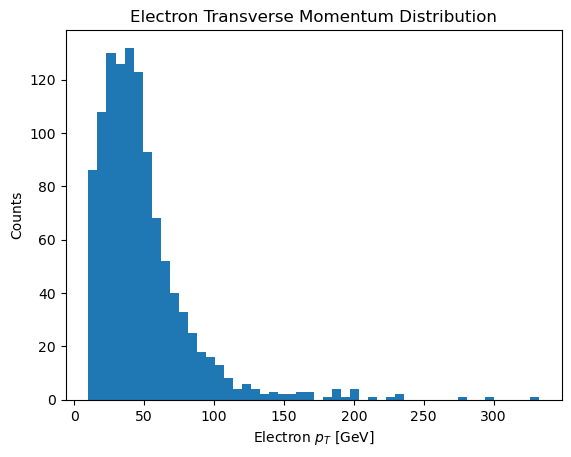

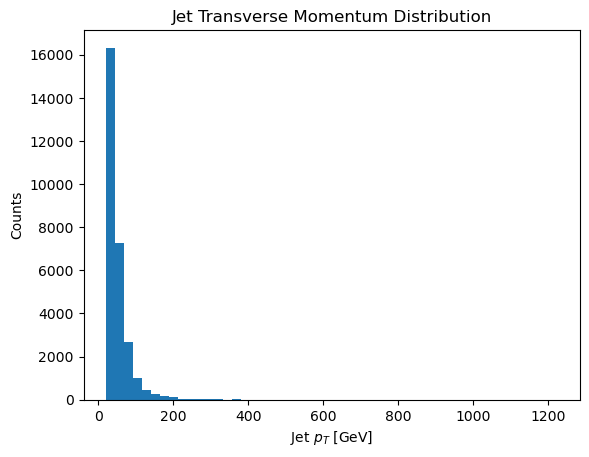

In [1]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt

# File path
path = "./madgraph_tutorial/MG5_aMC_v3_6_3/tutorial_pp_ww_local/Events/run_02/tag_1_delphes_events.root"

# 1) Open the ROOT file and grab the Delphes TTree
with uproot.open(path) as f:
    tree = f["Delphes"]

    # 2) Load the branches as awkward Arrays
    arrays = tree.arrays(
        ["Electron.PT", "Electron.Eta", "Jet.PT"],
        library="ak"
    )

# 3) Flatten the per‐event jagged arrays into 1D for plotting
electron_pt = ak.flatten(arrays["Electron.PT"])
electron_eta = ak.flatten(arrays["Electron.Eta"])
jet_pt      = ak.flatten(arrays["Jet.PT"])

# 4) Plot Electron pT
plt.figure()
plt.hist(ak.to_numpy(electron_pt), bins=50)
plt.xlabel("Electron $p_T$ [GeV]")
plt.ylabel("Counts")
plt.title("Electron Transverse Momentum Distribution")
plt.show()

# 5) Plot Jet pT
plt.figure()
plt.hist(ak.to_numpy(jet_pt), bins=50)
plt.xlabel("Jet $p_T$ [GeV]")
plt.ylabel("Counts")
plt.title("Jet Transverse Momentum Distribution")
plt.show()

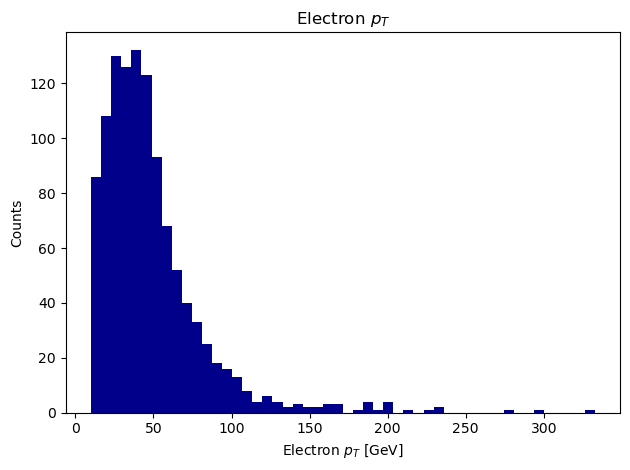

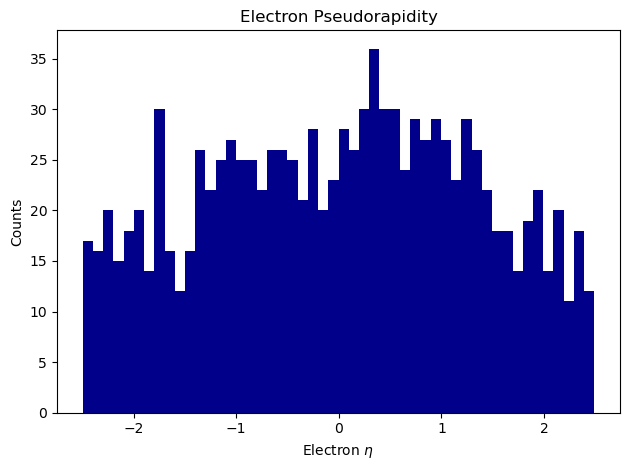

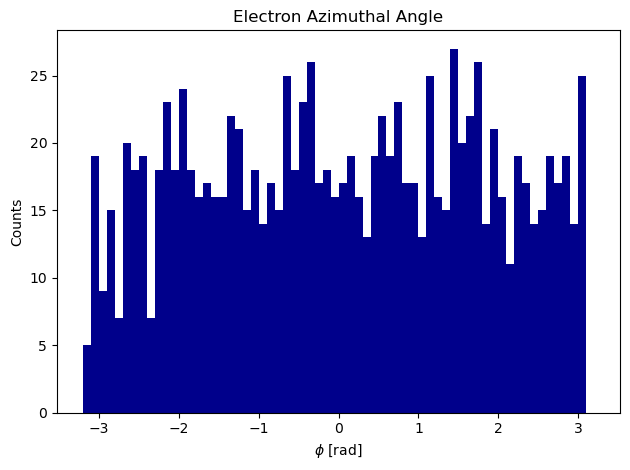

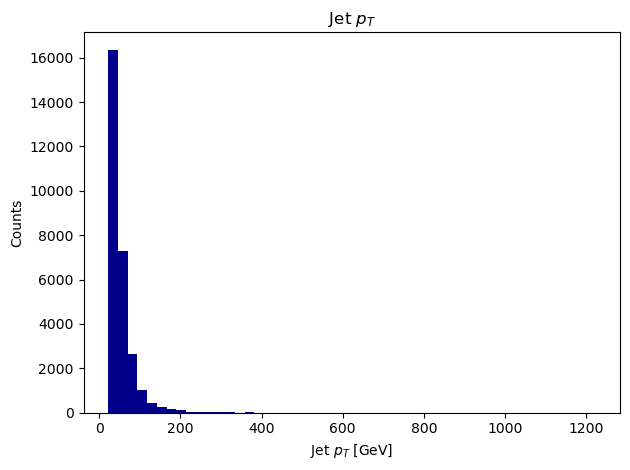

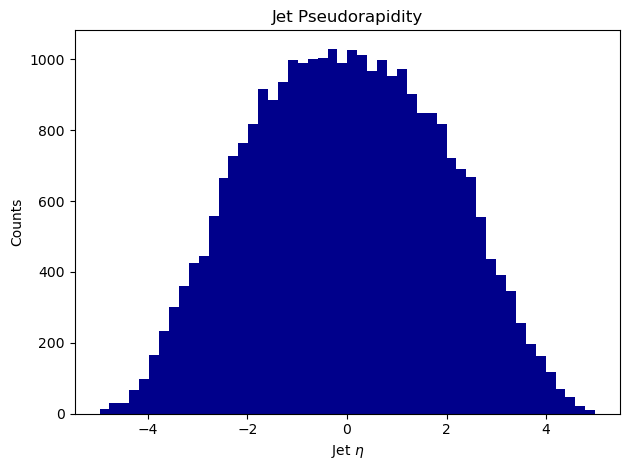

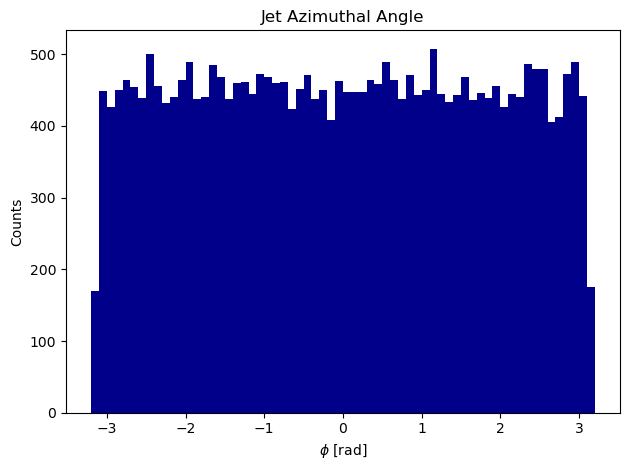

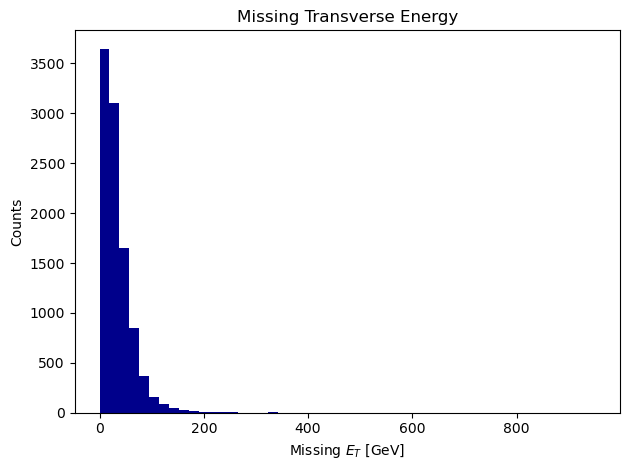

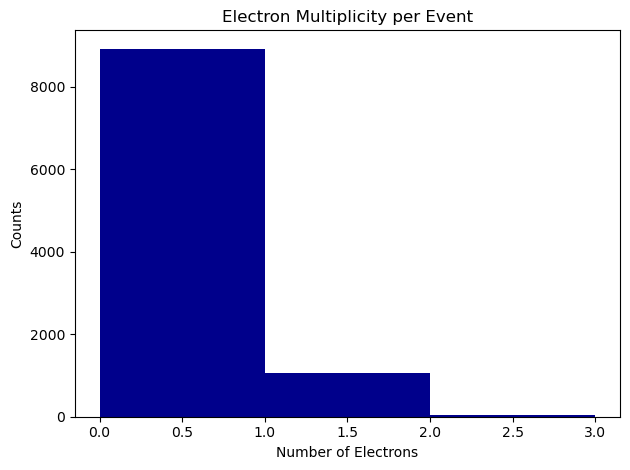

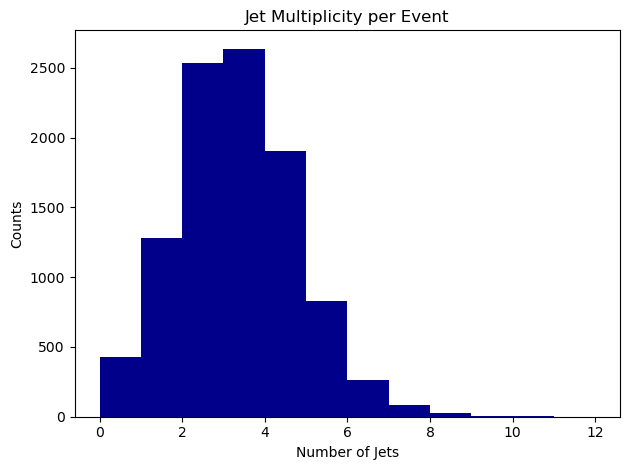

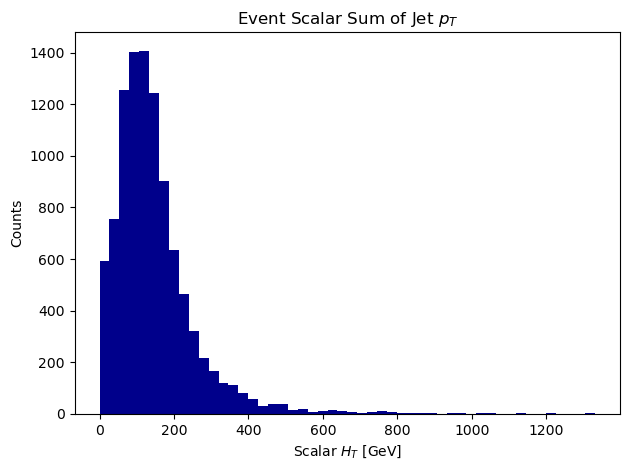

In [4]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt

# Correct File path
path = "./madgraph_tutorial/MG5_aMC_v3_6_3/tutorial_pp_ww_local/Events/run_02/tag_1_delphes_events.root"

# 1) Read the Delphes tree into awkward arrays
with uproot.open(path) as f:
    tree = f["Delphes"]
    arr = tree.arrays([
        "Electron.PT", "Electron.Eta", "Electron.Phi",
        "Jet.PT",      "Jet.Eta",      "Jet.Phi",
        "MissingET.MET"
    ], library="ak")

# 2) Flatten object-level arrays
ele_pt  = ak.flatten(arr["Electron.PT"])
ele_eta = ak.flatten(arr["Electron.Eta"])
ele_phi = ak.flatten(arr["Electron.Phi"])
jet_pt  = ak.flatten(arr["Jet.PT"])
jet_eta = ak.flatten(arr["Jet.Eta"])
jet_phi = ak.flatten(arr["Jet.Phi"])

# 3) Compute event-level quantities
met   = arr["MissingET.MET"]            # Missing ET per event
n_ele = ak.num(arr["Electron.PT"])      # # of electrons per event
n_jet = ak.num(arr["Jet.PT"])           # # of jets per event
ht    = ak.sum(arr["Jet.PT"], axis=1)   # Scalar HT = sum of jet pT

# 4) Helper for plotting with dark blue
def plot_hist(data, xlabel, title, bins=50, **kwargs):
    plt.figure()
    plt.hist(ak.to_numpy(data), bins=bins, color="darkblue", **kwargs)
    plt.xlabel(xlabel)
    plt.ylabel("Counts")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 5) Object-level distributions
plot_hist(ele_pt,  "Electron $p_T$ [GeV]",       "Electron $p_T$")
plot_hist(ele_eta, "Electron $\\eta$",            "Electron Pseudorapidity")
plot_hist(ele_phi, "$\\phi$ [rad]",               "Electron Azimuthal Angle", bins=64, range=[-3.2,3.2])

plot_hist(jet_pt,  "Jet $p_T$ [GeV]",            "Jet $p_T$")
plot_hist(jet_eta, "Jet $\\eta$",                 "Jet Pseudorapidity")
plot_hist(jet_phi, "$\\phi$ [rad]",               "Jet Azimuthal Angle", bins=64, range=[-3.2,3.2])

# 6) Event-level distributions
plot_hist(met,    "Missing $E_T$ [GeV]",         "Missing Transverse Energy")
plot_hist(n_ele,  "Number of Electrons",         "Electron Multiplicity per Event", bins=range(0, int(ak.max(n_ele))+2))
plot_hist(n_jet,  "Number of Jets",              "Jet Multiplicity per Event",      bins=range(0, int(ak.max(n_jet))+2))
plot_hist(ht,     "Scalar $H_T$ [GeV]",          "Event Scalar Sum of Jet $p_T$")


## 11. Next Steps

## 7. Next Steps
- Explore other final states
- Tune cuts and PDF choices
- Automate with scripts
- Integrate with full detector simulation